# Tutorial: The Scikit-learn Estimator API: `fit`, `predict`, `score`

Selamat datang di "batu Rosetta" dari Scikit-learn. Hampir setiap algoritma dalam library yang luar biasa ini mengikuti pola desain yang sama, yang dikenal sebagai **Estimator API**. Jika Anda memahami pola ini, Anda sudah 80% jalan untuk bisa menggunakan model apa pun, dari Regresi Linear sederhana hingga Neural Networks yang kompleks.

Pola ini berpusat pada tiga metode utama:
1.  **`.fit()`**: Proses belajar.
2.  **`.predict()`**: Proses menebak.
3.  **`.score()`**: Proses evaluasi cepat.

Di notebook ini, kita akan membedah setiap metode menggunakan `LinearRegression` sebagai contoh pertama kita.


### 1. Persiapan: Data dan Library

Pertama, mari kita siapkan semua yang kita butuhkan. Kita akan membuat data sintetis sederhana di mana hubungannya sangat jelas, sehingga kita bisa fokus pada API, bukan pada kompleksitas data.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

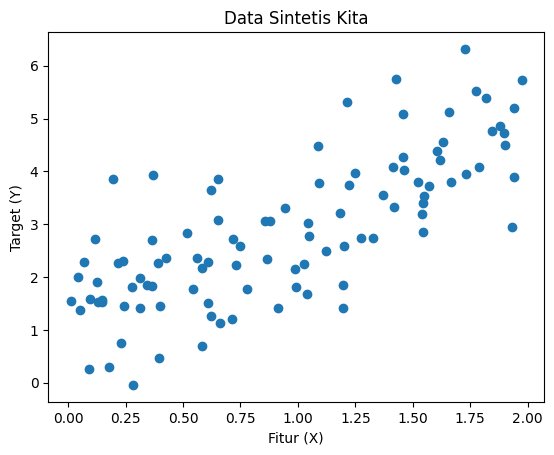

In [4]:
# membuat data contoh
# y = 2x + 1 + noise

np.random.seed(42)
X = 2 * np.random.rand(100,1)
Y = (2 * X) + 1 + np.random.randn(100, 1)

plt.scatter(X,Y)
plt.xlabel('Fitur (X)')
plt.ylabel('Target (Y)')
plt.title('Data Sintetis Kita')
plt.show()

In [5]:
# 1. train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(f'Ukuran X_train: {X_train.shape}')
print(f'Ukuran X_test: {X_test.shape}')

Ukuran X_train: (80, 1)
Ukuran X_test: (20, 1)


### 2. Metode `.fit()`: Proses Belajar 🧠

**Tujuan:** Untuk "melatih" atau "menyesuaikan" (*fit*) model dengan data pelatihan.

Saat kita memanggil `.fit(X_train, y_train)`, kita pada dasarnya berkata kepada model: "Lihatlah `X_train` dan `y_train` ini. Pelajari pola matematis yang menghubungkan input (X) ke output (y) yang benar."

Untuk Regresi Linear, "belajar" berarti menemukan nilai terbaik untuk *intercept* (`β₀`) dan *koefisien* (`β₁`) yang paling meminimalkan kesalahan pada data pelatihan.

In [6]:
# 1. inisialisasi model
model = LinearRegression()

# 2. melatih model
model.fit(X_train,Y_train)

# 3. setelah dilatih kita akan mendapatkan propertis
print(f'intercept: {model.intercept_[0]}')
print(f'koefisien: {model.coef_[0][0]}')

intercept: 1.1429133194585683
koefisien: 1.7993236574802751


kita tahu bahwa persamaan adalah 

y = mx + c

y = 1.79x + 1.14

### 3. Metode `.predict()`: Proses Menebak 🔮

**Tujuan:** Menggunakan model yang sudah dilatih untuk membuat prediksi pada data baru yang belum pernah dilihatnya.

Sekarang model kita sudah "pintar", kita bisa memberinya `X_test` (yang ia belum pernah lihat) dan memintanya untuk menebak nilai `y` yang sesuai. 

In [27]:
# melakukan prediksi data pengujian
Y_pred = model.predict(X_test)

# kita akan lihat 5 prediksi pertama dan bandingkan dengan jawaba sebenarnya
for i in range(5):
    print(f'prediksi: {Y_pred[i][0]:.2f} | actual : {Y_test[i][0]:.2f}')

# df = pd.DataFrame({'X_test': X_test.flatten(), 'Y_pred': Y_pred.flatten(), 'Y_test': Y_test.flatten()})
# print(df)

prediksi: 1.37 | actual : 1.91
prediksi: 4.36 | actual : 4.08
prediksi: 3.92 | actual : 2.85
prediksi: 3.53 | actual : 2.74
prediksi: 2.07 | actual : 2.83


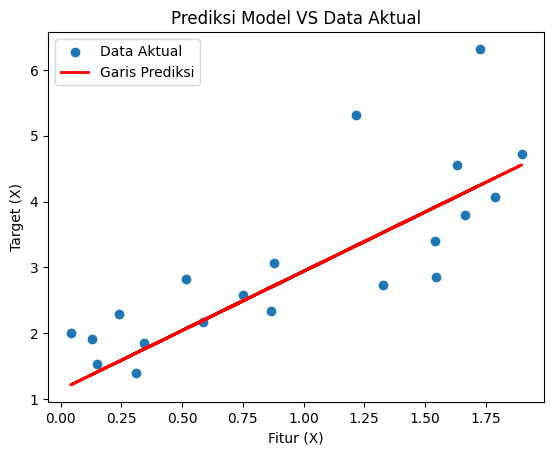

In [8]:
plt.scatter(X_test,Y_test,label='Data Aktual')
plt.plot(X_test,Y_pred,color='red',linewidth=2,label='Garis Prediksi')
plt.xlabel('Fitur (X)')
plt.ylabel('Target (X)')
plt.title('Prediksi Model VS Data Aktual')
plt.legend()
plt.show()

### 4. Metode `.score()`: Evaluasi Cepat 📊

**Tujuan:** Mendapatkan skor cepat tentang seberapa baik performa model pada satu set data.

Metode `.score(X, y)` secara internal akan membuat prediksi pada `X`, membandingkannya dengan jawaban `y` yang benar, dan mengembalikan metrik evaluasi default untuk model tersebut.

Untuk **model Regresi**, metrik defaultnya adalah **skor R-squared (R²)**.
* **R²** mengukur seberapa besar proporsi varians dalam variabel target yang dapat dijelaskan oleh model.
* Nilainya berkisar dari -∞ hingga 1.
* Semakin dekat ke 1, semakin baik modelnya. R² = 0.8 berarti model dapat menjelaskan 80% variasi dalam data.

### --- Contoh Kasus ---
#### Diketahui
y_actual = [1,2,3,4,5]
y_predict = [1.2, 1.8, 3.1, 3.9, 5.0]

#### Total variance (VARIANS DATA ASLI)
- mean(y)
  (1+2+3+4+5)/5 = 3
- Deviasi dari mean
  y_actual - mean =
  [1-3, 2-3, 3-3, 4-3, 5-3] = [-2, -1, 0, 1, 2]
- Kuadratkan
  [4, 1, 0, 1, 4]
- Rata-ratakan
  total_variance = (4+1+0+1+4)/5 = 2

#### ERROR VARIANCE (ini bagian baru)
- Hitung error (residual)
  y_actual - y_pred =
  [1-1.2, 2-1.8, 3-3.1, 4-3.9, 5-5.0] = [-0.2, 0.2, -0.1, 0.1, 0.0]
- Kuadratkan error
  [0.04, 0.04, 0.01, 0.01, 0.00]
- Rata-ratakan
  error_variance = (0.04+0.04+0.01+0.01+0.00)/5 = 0.02

#### Sekarang .score() (R²)
- Rumus konsepnya:
  `R² = 1 − (error_variance / total_variance)`
  R² = 1 − (0.02 / 2) = 1 − 0.01 = 0.99

#### Artinya:
99% variasi data bisa dijelaskan model
1% sisanya adalah kesalahan / noise

### --- Contoh Kasus ---

In [9]:
score = model.score(X_test,Y_test)
print(f'score: {score:.2f}')

score: 0.61
